In [26]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow. keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [27]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

In [28]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


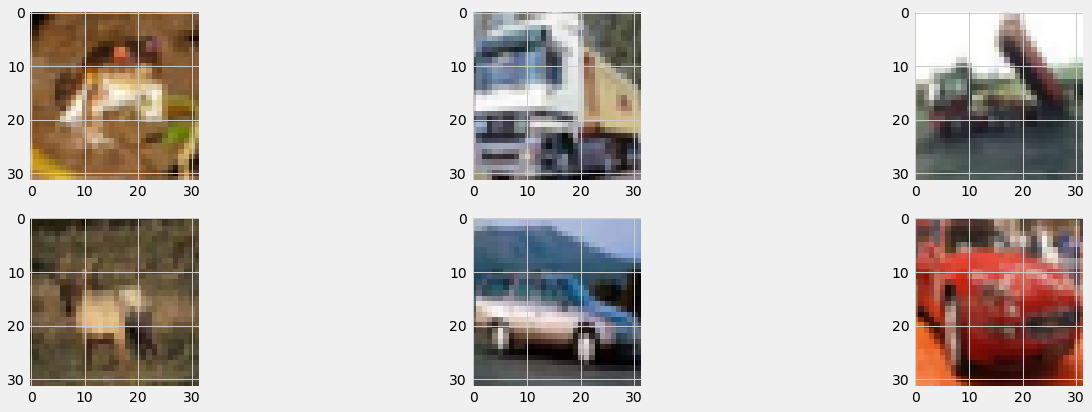

In [29]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
 plt.subplot(330+1+i)
 plt.imshow(train_X[i])
plt.show()

In [30]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_train shape:', x_test.shape)
print('y_train shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_train shape: (10000, 32, 32, 3)
y_train shape: (10000, 1)


In [31]:
index = 0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

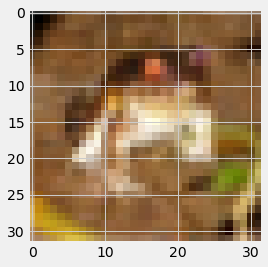

In [32]:
img = plt.imshow(x_train[index])

In [33]:
print('The image label is:',y_train[index])

The image label is: [6]


In [34]:
classification = ['airplane','automobile','bird','cat','deer','dog','frog','horse''ship','truck']
print('The image class is:', classification[y_train[index][0]])

The image class is: frog


In [35]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [36]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [37]:
print('The one hot label is:',y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [38]:
x_train = x_train / 255
x_test = x_test / 255

In [39]:
x_train[index]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [40]:
model = Sequential()

model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (5,5), activation='relu'))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(1000, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(500, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(250, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [41]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [42]:
#Train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 19s 119ms/step - loss: 1.7610 - accuracy: 0.3410 - val_loss: 1.4797 - val_accuracy: 0.4581
Epoch 2/10
157/157 [==============================] - 18s 117ms/step - loss: 1.4178 - accuracy: 0.4841 - val_loss: 1.3143 - val_accuracy: 0.5281
Epoch 3/10
157/157 [==============================] - 18s 117ms/step - loss: 1.2482 - accuracy: 0.5469 - val_loss: 1.2369 - val_accuracy: 0.5575
Epoch 4/10
157/157 [==============================] - 18s 117ms/step - loss: 1.1490 - accuracy: 0.5864 - val_loss: 1.1439 - val_accuracy: 0.5936
Epoch 5/10
157/157 [==============================] - 18s 118ms/step - loss: 1.0679 - accuracy: 0.6191 - val_loss: 1.0610 - val_accuracy: 0.6270
Epoch 6/10
157/157 [==============================] - 18s 117ms/step - loss: 0.9917 - accuracy: 0.6484 - val_loss: 0.9855 - val_accuracy: 0.6526
Epoch 7/10
157/157 [==============================] - 18s 117ms/step - loss: 0.9398 - accuracy: 0.6657 - val_loss: 1.0214 - val_ac

In [43]:
#Evaluate the model using the test dataset
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.9303 - accuracy: 0.6779


0.6779000163078308

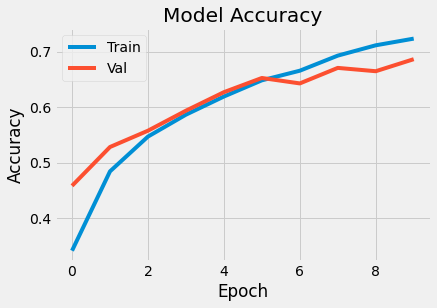

In [44]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

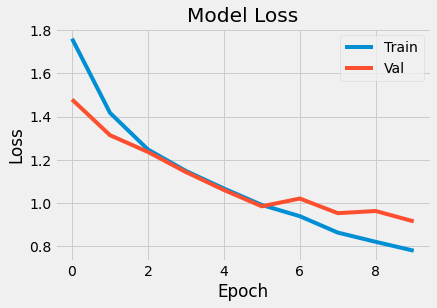

In [45]:
#Visualize the models loss
#Visualize the model accuracy
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

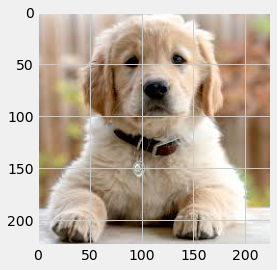

In [69]:
#Test the model with an exapmle
#show thw image
new_image = plt.imread('dog.jpg')
img = plt.imshow(new_image)

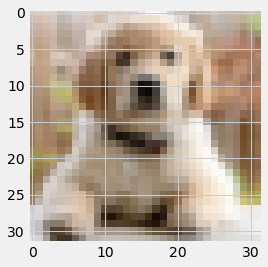

In [70]:
#resize
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [71]:
#get the model prediction
predictions= model.predict(np.array([resized_image]))
#show the prediction
predictions

array([[1.1880030e-04, 5.1574414e-05, 5.6510810e-02, 8.7138727e-02,
        5.3211063e-04, 8.5238802e-01, 5.2052707e-04, 2.6813918e-03,
        4.0382321e-05, 1.7676995e-05]], dtype=float32)

In [72]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#show the sorted labels in order
print(list_index)

[5, 3, 2, 7, 4, 6, 0, 1, 8, 9]


In [76]:
#print the first 7 predictions
for i in range(7):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

dog : 85.24 %
cat : 8.71 %
bird : 5.65 %
horseship : 0.27 %
deer : 0.05 %
frog : 0.05 %
airplane : 0.01 %
